Accuracy: 0.7972027972027972

Confusion Matrix:
 [[73  7]
 [22 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



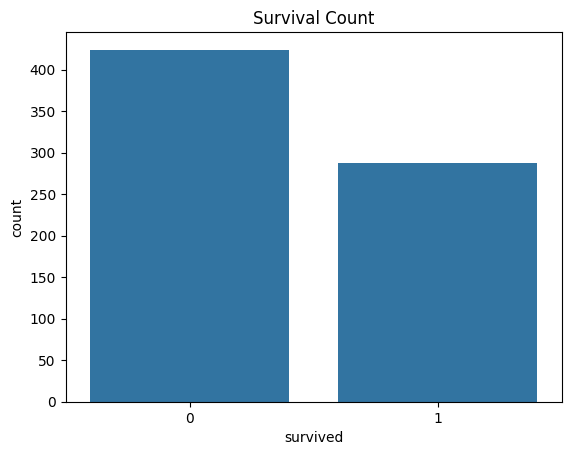

In [1]:
# Titanic Survival Prediction Project

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = sns.load_dataset("titanic")   # seaborn has a built-in Titanic dataset
df.head()

# Step 3: Data Cleaning
# Drop rows with missing values in important columns
df = df.dropna(subset=["age", "embarked", "sex"])

# Convert categorical to numeric
df['sex'] = df['sex'].map({"male": 0, "female": 1})
df['embarked'] = df['embarked'].map({"C": 0, "Q": 1, "S": 2})

# Select features and target
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
y = df["survived"]

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualization
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()